In [1]:
import keras
import json
import numpy as np
import pandas as pd
# import nibabel as nib
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K 

# import util
# from public_tests import *
# from test_utils import *
import nibabel as nib
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [8]:
import src.utils.mripp as mripp
import src.utils.plotter as pltter

In [7]:
# set home directory and data directory
HOME_DIR = "data/BraTS-Data/"
DATA_DIR = HOME_DIR


## 0. Visualize the Brain Tumor Example

03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Preprocessor Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Subsection Extraction BASE Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Subsection Extraction BASE Class
03/04//2024 12:32:1712127740 PM - INFO - MriPP: Initializing the Medical Image Subsection 

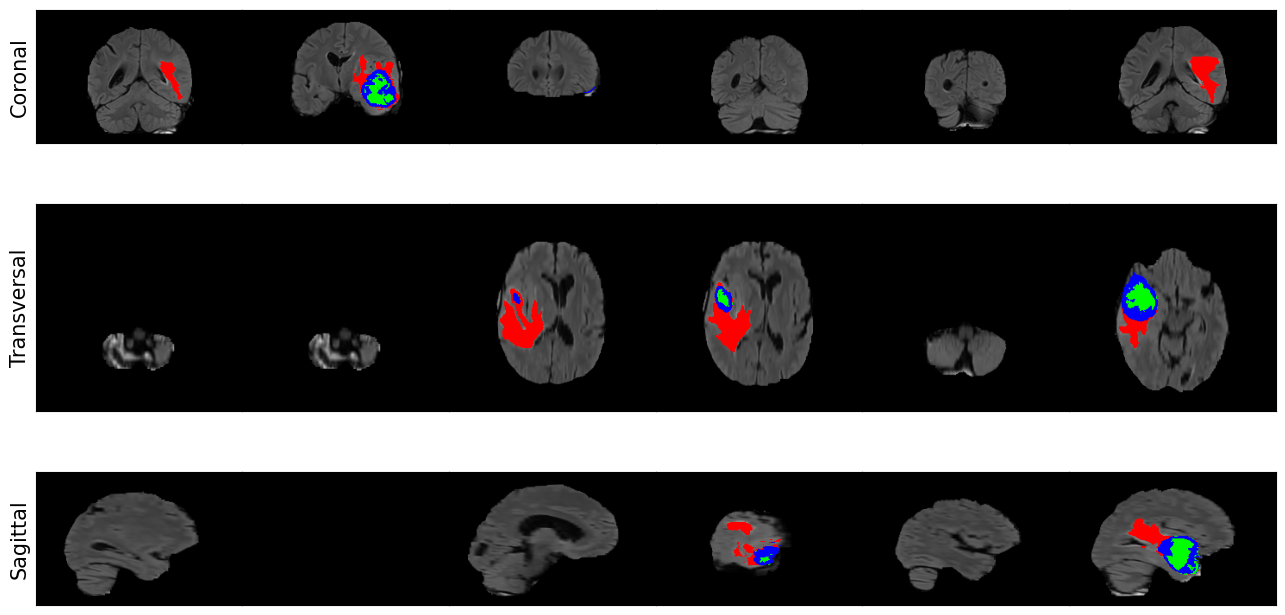

In [11]:
## Initialize the MRI preprocessing class and plotter
mripp_obj = mripp.MriPP(HOME_DIR)
## Get Image and labels for one example 
image, labels = mripp_obj.load_image(image_nifty_file=DATA_DIR + "imagesTr/BRATS_001.nii.gz", label_nifty_file=DATA_DIR + "labelsTr/BRATS_001.nii.gz")

image = pltter.get_labeled_image(image, labels)

pltter.plot_image_grid(image)


## 0.1. Generate Cool Gif with of Brain tumor example top view

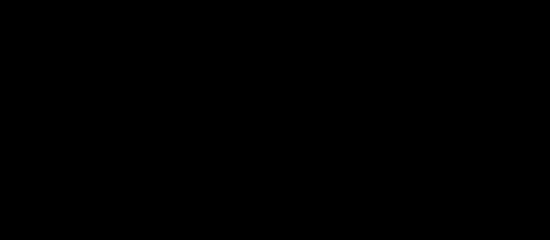

In [16]:
pltter.visualize_data_gif(pltter.get_labeled_image(image, labels))

In [18]:
patch_labels_one_hot = keras.utils.to_categorical(labels, num_classes=4)
print(patch_labels_one_hot)

[[[[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  ...

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]]


 [[[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]]

  [[1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   ...
   [1. 0. 0. 0.]
   [1. 0. 0. 0.]
   [1. 0. 0

## 0.2 Get Sub Volume Patch

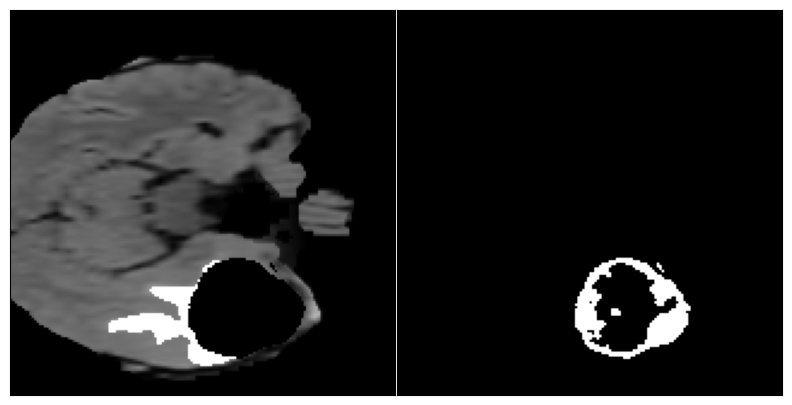

In [20]:

X, y = mripp_obj.get_sub_volume(image, labels)
# enhancing tumor is channel 2 in the class label
# you can change indexer for y to look at different classes
pltter.visualize_patch(X[0, :, :, :], y[2])